# Análisis de los resultados de Complejidad Económica para las provincias argentinas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import geopandas as gpd
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
import matplotlib.colors as mplc
import matplotlib.colors as mcolors
import networkx as nx

In [2]:
# Importo tipografía Fundar
import os
path = os.path.join(os.path.expanduser('~'), 'Documents/Proyectos/herramientas/')
import matplotlib.font_manager as font_manager
from matplotlib import rcParams
font_dir = [path + 'Archivo/']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
rcParams['font.family'] = 'Archivo'
font_manager.fontManager

In [3]:
fundar_colores_primarios = ['#7BB5C4', '#9FC1AD', '#D3D3E0',  '#8d9bff', '#FF9750', '#FFD900',]
fundar_colores_secundarios = ['#B5E0EA', '#B3B3B3', '#848279', '#AFA36E', '#5D896F', '#9C9CBC', '#E27124']

In [4]:
DATASETS_DIR = './datasets/'
SERIALIZABLES = './outputs/'

## Lee los serializables y dataframes

In [5]:
with open(SERIALIZABLES + f'relative_density.pkl','rb') as f:
    relative_density_prov = pickle.load(f)

with open(SERIALIZABLES + f'density.pkl','rb') as f:
    density_prov = pickle.load(f)

with open(SERIALIZABLES + f'ica.pkl','rb') as f:
    ica = pickle.load(f)

with open(SERIALIZABLES + f'relative_cog.pkl','rb') as f:
    cog = pickle.load(f)

with open(SERIALIZABLES + f'clae6.pkl','rb') as f:
    ramas = pickle.load(f)

with open(SERIALIZABLES + f'provincias.pkl','rb') as f:
    provincias = pickle.load(f)

with open(SERIALIZABLES + f'eci.pkl','rb') as f:
    eci = pickle.load(f)

with open(SERIALIZABLES + f'Mpa.pkl','rb') as f:
    Mpa = pickle.load(f)

with open(SERIALIZABLES + f'coi.pkl','rb') as f:
    coi = pickle.load(f)

In [6]:
df_RCA = pd.read_excel(DATAFRAMES_DIR + "df_RCA.xlsx")
df_RCA.clae6 = df_RCA.clae6.astype(int).apply(lambda x: f'{x:06}')
df_RCA.head(3)

,provincia,provincia_id,clae6,empleo,porc_prov,porc_act,RCA,M,loc_int,prod_int
0,Buenos Aires,6,011111,137,0.000039,0.000448,0.086494,0,0,0
1,Buenos Aires,6,011112,2848,0.000805,0.000705,1.142414,1,0,1
2,Buenos Aires,6,011119,11784,0.003332,0.003377,0.986962,0,0,2


In [7]:
desc_clae = pd.read_excel(DATASETS_DIR + "clae_agg.xlsx")
desc_clae.clae6 = desc_clae.clae6.astype(int).apply(lambda x: f'{x:06}')
desc_clae.head(3)

,clae6,clae6_desc,clae3,clae3_desc,clae2,clae2_desc,letra,letra_desc,letra_desc_mealy
0,014211,"Cría de ganado equino, excepto la realizada en...",14,Cría de animales,1,"Agricultura, ganadería, caza y servicios relac...",A,"Agricultura, Ganadería, y Pesca","Agricultura, Ganadería, y Pesca"
1,011331,Cultivo de hortalizas de hoja y de otras horta...,11,Cultivos temporales,1,"Agricultura, ganadería, caza y servicios relac...",A,"Agricultura, Ganadería, y Pesca","Agricultura, Ganadería, y Pesca"
2,014410,Cría de ganado ovino -excepto en cabañas y par...,14,Cría de animales,1,"Agricultura, ganadería, caza y servicios relac...",A,"Agricultura, Ganadería, y Pesca","Agricultura, Ganadería, y Pesca"


In [8]:
df_RCA = df_RCA.merge(desc_clae, how='left', on='clae6')

In [9]:
# Agrego las regiones para considerar
region = {'Buenos Aires': 'Pampeana', 
          'CABA': 'Pampeana',
          'Santa Fe': 'Pampeana',
          'Cordoba': 'Pampeana', 
          'La Pampa': 'Pampeana',
          'Catamarca': 'NOA', 
          'Salta': 'NOA', 
          'Jujuy': 'NOA', 
          'Tucuman': 'NOA', 
          'Santiago Del Estero': 'NOA',
          'Chaco': 'NEA', 
          'Formosa': 'NEA', 
          'Corrientes': 'NEA', 
          'Entre Rios': 'NEA', 
          'Misiones': 'NEA', 
          'Chubut': 'Patagonia', 
          'Tierra Del Fuego': 'Patagonia', 
          'Rio Negro': 'Patagonia', 
          'Santa Cruz': 'Patagonia',
          'Neuquen': 'Patagonia',
          'La Rioja': 'Cuyo', 
          'Mendoza': 'Cuyo', 
          'San Juan': 'Cuyo', 
          'San Luis': 'Cuyo'}

In [10]:
df_RCA['region'] = df_RCA['provincia'].map(region)

## Análisis de Location Quotient (especialización)

In [11]:
pivot_df = df_RCA.loc[df_RCA.M == 1].groupby(['provincia', 'letra_desc']).size().reset_index().pivot(index='provincia', columns='letra_desc', values=0)
pivot_df['row_sum'] = pivot_df.sum(axis=1)

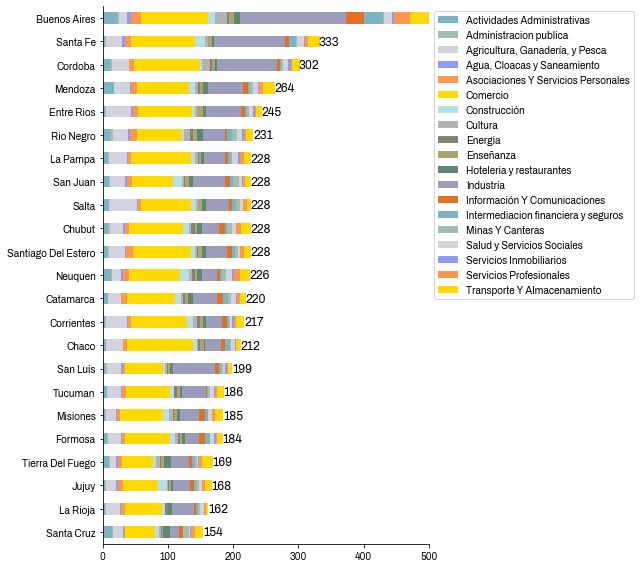

In [12]:
# Miro las LQ por provincia y por letra

pivot_df = pivot_df.sort_values(by='row_sum', ascending=True)
ax = pivot_df.drop(columns=['row_sum']).plot(kind='barh', stacked=True, figsize=(9, 8), color=fundar_colores_primarios+fundar_colores_secundarios)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel('')
plt.tight_layout()
for i, label in enumerate(pivot_df['row_sum']):
    plt.annotate(round(label), (label+30, i-0.15),fontsize=12, ha='right')
ax.set_xlim(0,500)
plt.show()

In [13]:
pivot_df = df_RCA.loc[df_RCA.M == 1][['region','letra_desc','clae6']].drop_duplicates(subset=['region', 'clae6']).groupby(['region', 'letra_desc']).size().sort_values(ascending=False).reset_index().pivot(index='region', columns='letra_desc', values=0)
pivot_df['row_sum'] = pivot_df.sum(axis=1)

custom_order = ['Pampeana', 'NOA', 'NEA','Cuyo', 'Patagonia']
pivot_df = pivot_df.reindex(reversed(custom_order))

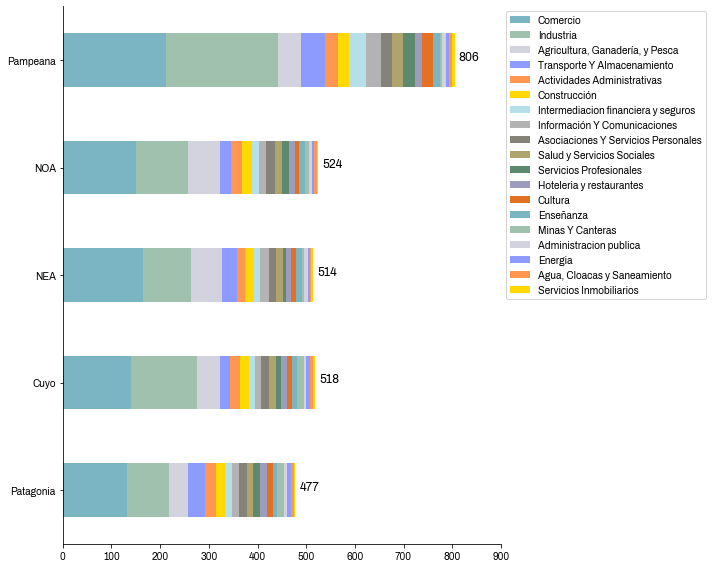

In [14]:
# Miro las LQ por región
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]
ax = pivot_df.drop(columns=['row_sum']).plot(kind='barh', stacked=True, figsize=(10, 8), color=fundar_colores_primarios+fundar_colores_secundarios)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel('')
plt.tight_layout()
for i, label in enumerate(pivot_df['row_sum']):
    plt.annotate(round(label), (label+50, i),fontsize=12, ha='right')
ax.set_xlim(0,900)
plt.show()

In [15]:
rca_agrupado_region = df_RCA.loc[df_RCA.M == 1][['region','letra_desc','clae6']].drop_duplicates(subset=['region', 'clae6']).groupby(['region', 'letra_desc']).size().to_frame()
rca_agrupado_region['% grupo'] = round((rca_agrupado_region[0] / rca_agrupado_region.groupby(level=0)[0].sum())*100,2)
rca_agrupado_region.reset_index(inplace = True)

# Sort the DataFrame by "provincia" in alphabetical order
rca_agrupado_region = rca_agrupado_region.sort_values(by='region', ascending=True)
pivot_df = rca_agrupado_region.pivot(index='region', columns='letra_desc', values='% grupo')
pivot_df

letra_desc,Actividades Administrativas,Administracion publica,"Agricultura, Ganadería, y Pesca","Agua, Cloacas y Saneamiento",Asociaciones Y Servicios Personales,Comercio,Construcción,Cultura,Energia,Enseñanza,Hoteleria y restaurantes,Industria,Información Y Comunicaciones,Intermediacion financiera y seguros,Minas Y Canteras,Salud y Servicios Sociales,Servicios Inmobiliarios,Servicios Profesionales,Transporte Y Almacenamiento
region,,,,,,,,,,,,,,,,,,,
Cuyo,4.05,0.97,8.88,1.35,3.09,27.03,3.28,1.74,1.35,2.12,2.51,26.25,2.70,2.32,2.70,2.70,0.77,1.93,4.25
NEA,3.50,1.36,12.65,0.58,2.92,32.10,3.31,2.33,0.78,2.33,1.95,19.07,3.31,2.72,0.78,2.72,0.78,1.17,5.64
NOA,4.39,0.95,12.40,0.95,3.63,28.63,3.82,1.53,1.15,2.10,2.67,20.42,2.67,2.67,1.72,2.67,0.38,2.67,4.58
Pampeana,3.47,0.87,5.83,0.74,2.85,26.30,2.61,2.73,0.74,1.61,1.86,28.54,3.85,4.47,0.74,2.61,0.87,3.23,6.08
Patagonia,4.61,1.47,8.39,1.26,3.35,27.46,3.98,2.73,1.47,1.89,2.94,18.24,2.94,3.14,2.73,2.73,0.63,2.94,7.13


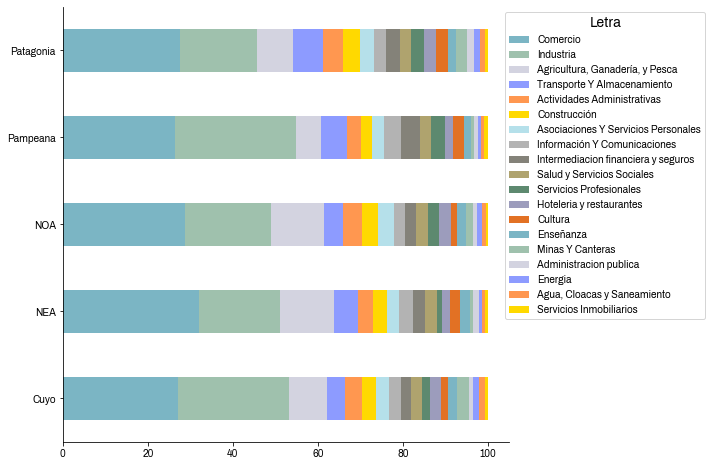

In [16]:
# Ahora lo miro por %
pivot_df = pivot_df[pivot_df.sum().sort_values(ascending=False).index]
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(8, 8), color=fundar_colores_primarios+fundar_colores_secundarios)
plt.xlabel('')
plt.ylabel('')
ax.legend(title='Letra', title_fontsize='14', loc='upper right', bbox_to_anchor=(1.45, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

## Análisis de la complejidad de las provincias

In [17]:
df_eci = pd.DataFrame(zip(provincias, eci)).sort_values(by = 1, ascending= False)
df_eci.rename(columns= {0:'provincia', 1: 'ECI'}, inplace=True)
df_eci.reset_index(drop = True, inplace=True)

In [18]:
df_eci

,provincia,ECI
0,Buenos Aires,4.231254
1,Santa Fe,1.236544
2,Cordoba,0.499901
3,Tierra Del Fuego,0.474662
4,San Luis,0.259899
5,Mendoza,-0.084972
6,San Juan,-0.228591
7,Tucuman,-0.233229
8,Misiones,-0.234125
9,Chaco,-0.254351


In [19]:
# Leemos el archivo shapefile con las coordenadas de Argentina a nivel departamento para plotear un mapa
shp_path = './maps/'
shapefile = gpd.read_file(shp_path+'pxdptodatosok.shp')
shapefile = shapefile[~shapefile['departamen'].isin(['Antártida Argentina'])] #Sacamos Antártida
shapefile = shapefile[~shapefile['provincia'].isin(['Ciudad Autónoma de Buenos Aires'])] #Sacamos Ciudad

shapefile = gpd.GeoDataFrame(shapefile, geometry='geometry', crs='epsg:4326')
shapefile['centroid'] = shapefile.centroid
shapefile.head()

C:\Users\Pluvini\AppData\Local\Temp\ipykernel_12836\2593866447.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile['centroid'] = shapefile.centroid


,link,codpcia,departamen,provincia,mujeres,varones,personas,hogares,viv_part,viv_part_h,geometry,centroid
4,06091,06,Berazategui,Buenos Aires,165636,158608,324244,93164,96025,86248,"POLYGON ((-58.01702 -34.78120, -58.08380 -34.8...",POINT (-58.15534 -34.81895)
5,74056,74,La Capital,San Luis,104417,99602,204019,58559,62166,53317,"POLYGON ((-67.18339 -33.11857, -67.00460 -33.1...",POINT (-66.51213 -33.81825)
8,06147,06,Carlos Casares,Buenos Aires,11381,10856,22237,7775,9446,7504,"POLYGON ((-61.53276 -35.38011, -61.48721 -35.4...",POINT (-61.37463 -35.75128)
12,06154,06,Carlos Tejedor,Buenos Aires,5764,5806,11570,3976,5011,3832,"POLYGON ((-62.27112 -35.15377, -62.26809 -35.1...",POINT (-62.43003 -35.38279)
14,06161,06,Carmen de Areco,Buenos Aires,7364,7328,14692,4631,5571,4498,"POLYGON ((-59.78239 -34.22060, -59.77912 -34.2...",POINT (-59.88516 -34.40847)


In [20]:
#Unifico nombres
shapefile = shapefile.replace("Córdoba", "Cordoba")
shapefile = shapefile.replace("Entre Ríos", "Entre Rios")
shapefile = shapefile.replace("Neuquén", "Neuquen")
shapefile = shapefile.replace("Río Negro", "Rio Negro")
shapefile = shapefile.replace("Tucumán", "Tucuman")
shapefile = shapefile.replace("Santiago del Estero", "Santiago Del Estero")
shapefile = shapefile.replace("Tierra del Fuego", "Tierra Del Fuego")

In [21]:
# ¿Son todos los nombres de las provincias iguales o tenemos que ajustar alguno?
for i in range(0,23):
    if np.sort(list(df_eci['provincia']))[i]!=shapefile['provincia'].sort_values().unique()[i]:
        print('Diferencia en index', i)

In [22]:
# Dado que el mapa con los ECI originales quedaba extraño, no había una buena diferencia en el gradiente, hago rangos
def categorize_eci(eci):
    if eci >= 2:
        return '5-2'
    elif eci >= 1:
        return '1-2'
    elif eci >= 0:
        return '0-1'
    elif eci >= -0.25:
        return '-0.25 - 0'
    elif eci >= -0.5:
        return '-0.5- -0.25'
    else:
        return '-1--0.5'
    
df_eci['ECI_range'] = df_eci['ECI'].apply(categorize_eci)

In [23]:
# Mergeo el mapa con los datos del ECI para graficar esos valores
shapefile_map = shapefile.merge(df_eci, on = 'provincia', how = 'left')
shapefile_map = shapefile_map[~shapefile_map['provincia'].isin(['Ciudad Autónoma de Buenos Aires'])]

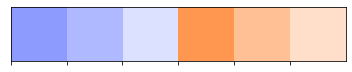

In [24]:
# Creo una paleta específica para mis rangos
gyr = ['#8d9bff', '#afb9ff', '#dce1ff', '#FF9750','#ffc096','#ffdfca',  ]
sns.palplot(sns.color_palette(gyr))
paleta_fundar_2 = mplc.ListedColormap(sns.color_palette(list(reversed(gyr))))

C:\Users\Pluvini\AppData\Local\Temp\ipykernel_12836\4111926843.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(reversed(legend_labels))


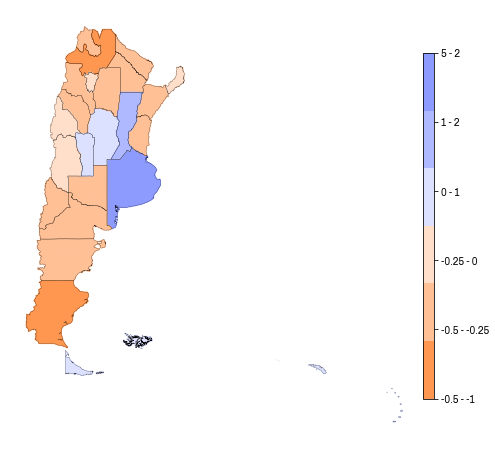

In [25]:
# Creo la función y grafico el mapa
def plot_map(shapefile, column, title, color_palette, path_grafico):
    fig, ax = plt.subplots(1, figsize=(14, 8))
    cax = fig.add_axes([0.72, 0.2, 0.01, 0.6])

    shapefile.plot(column=column,
                   cmap=color_palette,
                   ax=ax,
                   edgecolor='face',
                   cax=cax,
                   legend=False
                   )

    shapefile.dissolve('provincia').plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.2)
    ax.set_title(title, fontsize=20)
    ax.tick_params(labelsize=8)
    ax.axis('off')

    # Creo una leyenda custom por los rangos
    color_bar = mplc.ListedColormap(sns.color_palette(list(reversed(['#8d9bff', '#afb9ff', '#dce1ff', '#ffdfca', '#ffc096','#FF9750']))))
    legend_labels = ['5 - 2', '1 - 2', '0 - 1', '-0.25 - 0', '-0.5 - -0.25', '-0.5 - -1']
    cmap = plt.cm.get_cmap(color_bar)
    norm = mcolors.Normalize(vmin=0, vmax=len(legend_labels) - 1)
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    cbar = fig.colorbar(sm, cax=cax)
    cbar.ax.set_yticklabels(reversed(legend_labels))
    fig.savefig(path_grafico, dpi=600, bbox_inches='tight', transparent=True)
    plt.show()

plot_map(shapefile_map, 'ECI_range', '', paleta_fundar_2, "figs/plot_eci_map.svg")

## Análisis de la complejidad de las actividades

In [26]:
# Creo un dataframe a partir de los serializables
df_ica = pd.DataFrame(zip(ramas, ica)).rename(columns={0:'clae6', 1:'ica'})
df_ica = df_ica.merge(desc_clae, how = 'left')
df_ica.head(2)

,clae6,ica,clae6_desc,clae3,clae3_desc,clae2,clae2_desc,letra,letra_desc,letra_desc_mealy
0,011111,-0.645547,Cultivo de arroz,11,Cultivos temporales,1,"Agricultura, ganadería, caza y servicios relac...",A,"Agricultura, Ganadería, y Pesca","Agricultura, Ganadería, y Pesca"
1,011112,0.009314,Cultivo de trigo,11,Cultivos temporales,1,"Agricultura, ganadería, caza y servicios relac...",A,"Agricultura, Ganadería, y Pesca","Agricultura, Ganadería, y Pesca"


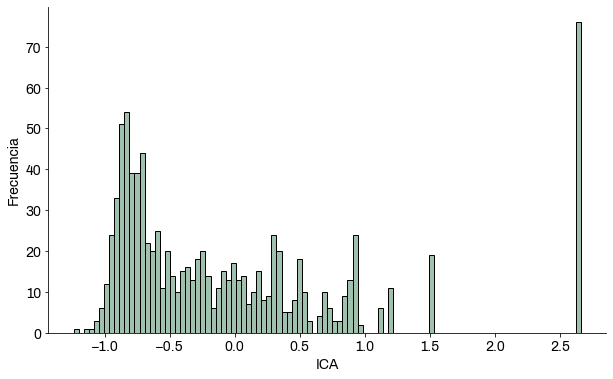

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(df_ica['ica'], bins=100, color=fundar_colores_primarios[1], edgecolor='black')  
plt.xlabel('ICA',fontsize=14) 
plt.ylabel('Frecuencia', fontsize=14) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('') 
ax.spines[['right', 'top']].set_visible(False) 
plt.show()

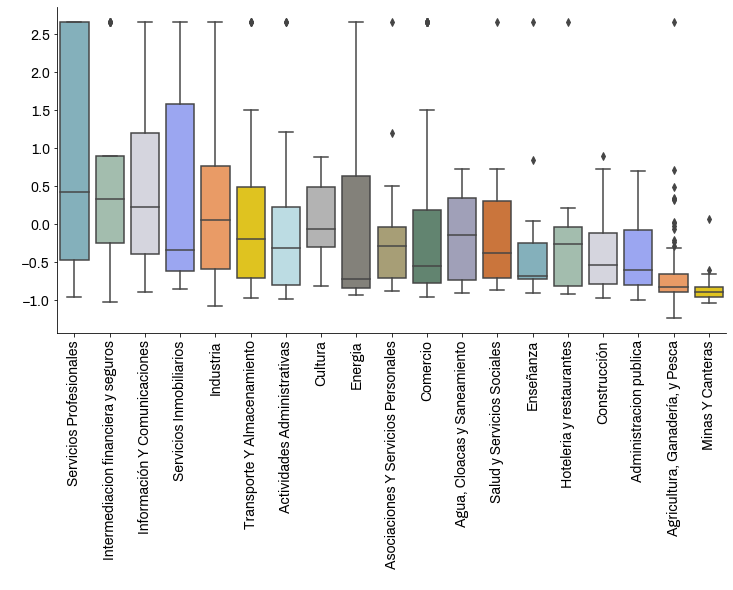

In [28]:
means = df_ica.drop_duplicates(subset='clae6', keep='first').groupby('letra_desc')['ica'].mean()
sorted_means = means.sort_values(ascending=True)
sorted_df = df_ica[df_ica['letra_desc'].isin(sorted_means.index)]
sorted_df = sorted_df.drop_duplicates(subset='clae6', keep='first')

sorted_df = sorted_df.sort_values(by=['letra_desc'], key=lambda x: x.map(sorted_means), ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=sorted_df, y="ica", x="letra_desc", palette=fundar_colores_primarios+fundar_colores_secundarios)
plt.ylabel(" ")
plt.xlabel(" ")
plt.xticks(fontsize=14, rotation = 90)
plt.yticks(fontsize=14)
sns.despine()
plt.show()

In [29]:
df_ica.groupby(['letra','letra_desc'])['ica'].mean().to_frame()

,,ica
letra,letra_desc,
A,"Agricultura, Ganadería, y Pesca",-0.653436
B,Minas Y Canteras,-0.824282
C,Industria,0.233077
D,Energia,-0.048500
E,"Agua, Cloacas y Saneamiento",-0.156435
F,Construcción,-0.354744
G,Comercio,-0.153676
H,Transporte Y Almacenamiento,0.102638
I,Hoteleria y restaurantes,-0.260613


## Análisis con grafos

In [30]:
# Leo la matriz de proximidades
proximity = pd.read_csv("dataframes/proximity.csv",index_col=0)
products = proximity.index.tolist()
proximity_values = proximity.values

new_proxi = proximity_values - np.diag(np.ones(proximity_values.shape[0]))

In [31]:
print(f'Porcentaje de proximidades iguales a cero: {100*(new_proxi == 0.0).sum()/(len(products)**2):2.2f} %')
print(f'Porcentaje de proximidades menores a 0.1: {100*(new_proxi < 0.1).sum()/(len(products)**2):2.2f} %')
print(f'Porcentaje de proximidades menores a 0.2: {100*(new_proxi < 0.2).sum()/(len(products)**2):2.2f} %')
print(f'Porcentaje de proximidades menores a 0.6: {100*(new_proxi < 0.6).sum()/(len(products)**2):2.2f} %')

Porcentaje de proximidades iguales a cero: 26.04 %
Porcentaje de proximidades menores a 0.1: 30.66 %
Porcentaje de proximidades menores a 0.2: 51.12 %
Porcentaje de proximidades menores a 0.6: 97.41 %


In [32]:
G = nx.from_numpy_array(new_proxi, parallel_edges=False, create_using=nx.Graph)
T = nx.maximum_spanning_tree(G)

layout_params = {
    'k': 100,  # Increase this value for greater separation
    'scale': 2.0,  # You can adjust this as well to control the layout scale
}

### Grafo con sectores

In [33]:
# Me quedo solo con las ramas que efectivamente tienen empleo, las 943
desc_clae = desc_clae[desc_clae['clae6'].isin(ramas)]
desc_clae = desc_clae.reset_index(drop = True)

In [34]:
colors = ['#7BB5C4', '#9FC1AD','#8d9bff', '#D3D3E0',   '#FF9750', '#B5E0EA', '#FFD900','#5D896F','#151515', '#AFA36E','#B3B3B3']
category_color_map = {}

unique_categories = desc_clae['letra_desc_mealy'].unique()
for i, category in enumerate(unique_categories):
    category_color_map[category] = colors[i % len(colors)]  # Use modulo to cycle through colors if needed

node_colors = [category_color_map[desc_clae.loc[i, 'letra_desc_mealy']] for i in range(len(desc_clae))]

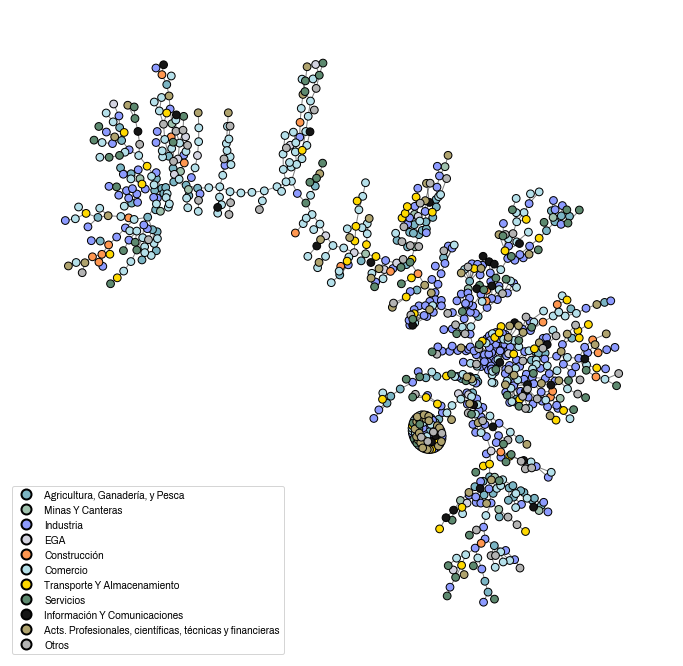

In [35]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.axis('off')
layo = nx.spring_layout(T, k=0.1, iterations=70, seed=1)
layo = nx.kamada_kawai_layout(T, pos=layo)
rca_nodes = nx.draw_networkx_nodes(T, layo, node_shape='o', node_size=60, node_color=node_colors)
rca_nodes.set_edgecolor('black')
nx.draw_networkx_edges(T, layo, alpha=0.5)

legend_elements = []
for category, color in zip(unique_categories, colors):
    legend_elements.append(Line2D([0], [0], marker='o', color='w', label=category,
                                  markerfacecolor=color, markeredgewidth=2.0, markeredgecolor='black', markersize=10))

ax.legend(handles=legend_elements, loc='lower left')
plt.show()

### Grafo de los nodos donde Córdoba tiene especialización y otros particulares

In [36]:
G = nx.from_numpy_array(new_proxi, parallel_edges=False, create_using=nx.Graph)
T = nx.maximum_spanning_tree(G)

idx_prov = np.where(provincias == 'Cordoba')
idx_prov

(array([2], dtype=int64),)

In [37]:
rca_may1 = []
rca_men1 = []
rca_may1_col = []
rca_men1_col = []
te = []
te_col =[]
mate = []
mate_col =[]
repoblacion = []
repoblacion_col = []
forestal = []
forestal_col = []

for node in T:

    if Mpa[idx_prov][0][node] == 1:
            rca_may1.append(node)
            rca_may1_col.append('#94A1FE')
            
    elif Mpa[idx_prov][0][node] == 0:
        forestal_check = [np.where(ramas == branch)[0] for branch in ['024020']]
        repoblacion_check = [np.where(ramas == branch)[0] for branch in ['021020']]
        te_check = [np.where(ramas == branch)[0] for branch in ['107920']]
        mate_check = [np.where(ramas == branch)[0] for branch in ['107930']]

        if node in forestal_check:
            forestal.append(node)
            forestal_col.append('#FFD900')
        elif node in repoblacion_check:
            repoblacion.append(node)
            repoblacion_col.append('#FF9750')
        elif node in te_check:
            te.append(node)
            te_col.append('#9FC1AD')
        elif node in mate_check:
            mate.append(node)
            mate_col.append('#7BB5C4')
        
        else:
            rca_men1.append(node)
            rca_men1_col.append('white')

    else:
        print('ERROR: algun RCA es menor a cero?')

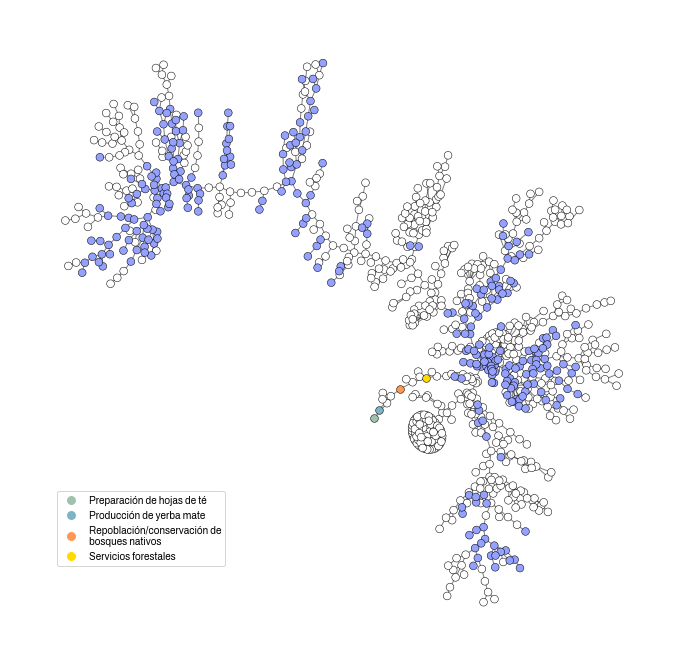

In [38]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.axis('off')
layo = nx.spring_layout(T, k=0.1, iterations=70, seed=1)
layo = nx.kamada_kawai_layout(T, pos=layo)
no_rca_nodes = nx.draw_networkx_nodes(T, layo, nodelist=rca_men1, node_color=rca_men1_col, node_shape='o', node_size=60)
no_rca_nodes.set_edgecolor('black')
no_rca_nodes.set_linewidths(0.5)  
rca_nodes = nx.draw_networkx_nodes(T, layo, nodelist=rca_may1, node_color=rca_may1_col, node_shape='o', node_size=60)
rca_nodes.set_edgecolor('black')
rca_nodes.set_linewidths(0.5)  
te_nodes = nx.draw_networkx_nodes(T, layo, nodelist=te, node_color=te_col, node_shape='o', node_size=60)
te_nodes.set_edgecolor('black')
te_nodes.set_linewidths(0.5) 
mate_nodes = nx.draw_networkx_nodes(T, layo, nodelist=mate, node_color=mate_col, node_shape='o', node_size=60)
mate_nodes.set_edgecolor('black')
mate_nodes.set_linewidths(0.5) 
repoblacion_nodes = nx.draw_networkx_nodes(T, layo, nodelist=repoblacion, node_color=repoblacion_col, node_shape='o', node_size=60)
repoblacion_nodes.set_edgecolor('black')
repoblacion_nodes.set_linewidths(0.5) 
forestal_nodes = nx.draw_networkx_nodes(T, layo, nodelist=forestal, node_color=forestal_col, node_shape='o', node_size=60)
forestal_nodes.set_edgecolor('black')
forestal_nodes.set_linewidths(0.5) 
nx.draw_networkx_edges(T, layo, alpha=0.5)
legend_colors = ['#9FC1AD', '#7BB5C4','#FF9750','#FFD900']
legend_labels = ['Preparación de hojas de té', 'Producción de yerba mate', 'Repoblación/conservación de\nbosques nativos','Servicios forestales']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_handles, loc='center', bbox_to_anchor = (0.2,0.2))
plt.show()